In [1]:
# Import the required modules
import pandas as pd
import numpy as np

In [2]:
# Read the respiratory rate file 'suresh-rr'
df_rr = pd.read_csv('C:\\Users\\sures\\Downloads\\suresh-rr.csv')

In [3]:
# Check the dataframe
df_rr.head(5)

,timestamp,rr,rr_std
0,9/11/2017 14:44,12.514043,26.100737
1,9/11/2017 14:45,14.149804,3.921936
2,9/11/2017 14:46,14.778218,1.097793
3,9/11/2017 14:47,12.203877,1.493707
4,9/11/2017 14:48,10.389535,1.005532


In [4]:
# Check whether all rows loaded
len(df_rr)

280279

In [5]:
#Checking the count of nulls
df_rr.isnull().sum()

timestamp     0
rr           24
rr_std        0
dtype: int64

In [30]:
df_rr = df_rr.dropna(subset=['rr'])
len(df_rr)

279376

In [58]:
# Removing potential errors described as rr <= 0 and rr > 30
df_rr = df_rr.loc[~((df_rr['rr']<0) | (df_rr['rr'] >30))]

In [59]:
len(df_rr)

279376

In [60]:
# Checking the data after removing the errors
df_rr.describe()

,rr,rr_std,Year,Month,Day,time_hour
count,279376.000000,279376.000000,279376.000000,279376.000000,279376.000000,279376.000000
mean,15.266012,1.365762,2017.575135,6.920297,16.089002,11.624979
std,3.834167,0.867040,0.563164,3.938307,8.612822,7.052442
min,0.037820,-19.707899,2017.000000,1.000000,1.000000,0.000000
25%,12.922254,0.635578,2017.000000,4.000000,9.000000,5.000000
50%,15.085860,1.159914,2018.000000,6.000000,16.000000,12.000000
75%,17.593195,1.821576,2018.000000,11.000000,23.000000,18.000000
max,29.989101,26.100737,2019.000000,12.000000,31.000000,23.000000


In [61]:
# Splitting the timestamp into date and time
df_new = pd.to_datetime(df_rr['timestamp'], format='%m/%d/%Y %H:%M')
df_rr['date'] = df_new.dt.date
df_rr['time'] = df_new.dt.time

In [62]:
# Checking the new data
df_rr.head(5)

,timestamp,rr,rr_std,date,time,day_of_week,Year,Month,Day,time_hour,day_type
0,9/11/2017 14:44,12.514043,26.100737,2017-09-11,14:44:00,Monday,2017,9,11,14,work_day
1,9/11/2017 14:45,14.149804,3.921936,2017-09-11,14:45:00,Monday,2017,9,11,14,work_day
2,9/11/2017 14:46,14.778218,1.097793,2017-09-11,14:46:00,Monday,2017,9,11,14,work_day
3,9/11/2017 14:47,12.203877,1.493707,2017-09-11,14:47:00,Monday,2017,9,11,14,work_day
4,9/11/2017 14:48,10.389535,1.005532,2017-09-11,14:48:00,Monday,2017,9,11,14,work_day


In [221]:
# Checking for data types
df_rr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279376 entries, 0 to 280278
Data columns (total 16 columns):
timestamp      279376 non-null object
rr             279376 non-null float64
rr_std         279376 non-null float64
date           279376 non-null datetime64[ns]
time           279376 non-null datetime64[ns]
day_of_week    279376 non-null object
Year           279376 non-null int64
Month          279376 non-null int64
Day            279376 non-null int64
time_hour      279376 non-null int64
day_type       279376 non-null object
day_phase      279376 non-null object
time_type      279376 non-null object
mind_state     279376 non-null object
Season         279376 non-null object
DST            279376 non-null object
dtypes: datetime64[ns](2), float64(2), int64(4), object(8)
memory usage: 46.2+ MB


In [64]:
# Converting 'date' to data type datetime
df_rr['date'] = pd.to_datetime(df_rr['date'], errors='coerce')

In [65]:
# Converting 'time' to data type datetime
df_rr['time'] = pd.to_datetime(df_rr['time'], format='%H:%M:%S' ).apply(pd.Timestamp)

In [222]:
# Checking the new dataframe
df_rr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279376 entries, 0 to 280278
Data columns (total 16 columns):
timestamp      279376 non-null object
rr             279376 non-null float64
rr_std         279376 non-null float64
date           279376 non-null datetime64[ns]
time           279376 non-null datetime64[ns]
day_of_week    279376 non-null object
Year           279376 non-null int64
Month          279376 non-null int64
Day            279376 non-null int64
time_hour      279376 non-null int64
day_type       279376 non-null object
day_phase      279376 non-null object
time_type      279376 non-null object
mind_state     279376 non-null object
Season         279376 non-null object
DST            279376 non-null object
dtypes: datetime64[ns](2), float64(2), int64(4), object(8)
memory usage: 46.2+ MB


In [67]:
import matplotlib.pyplot as plt

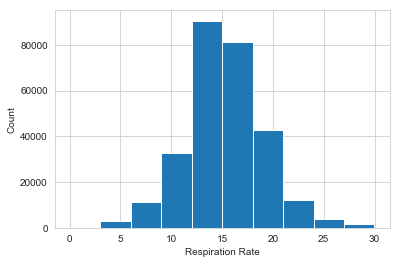

In [68]:
# plotting to see the distribution of Respiratory Rate
plt.hist(df_rr['rr'])
plt.xlabel('Respiration Rate')
plt.ylabel('Count')
plt.show()

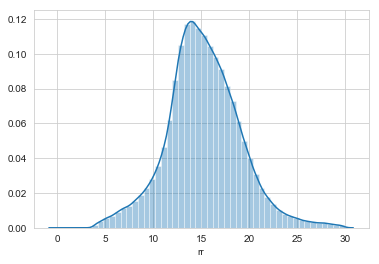

In [69]:
import seaborn as sns

sns.distplot(df_rr['rr'])

In [76]:
# Inserting a new column "day of the week"
df_rr['day_of_week'] = df_rr['date'].dt.day_name()

In [77]:
#df_rr.head(5)

In [78]:
# Creating columns for Year, Month, Day and Hour
df_rr['Year'] = df_rr['date'].dt.year
df_rr['Month'] = df_rr['date'].dt.month
df_rr['Day'] = df_rr['date'].dt.day
df_rr['time_hour'] = df_rr['time'].dt.hour

In [79]:
# Creating a column "day_type" based on days

def day_type(c):
    
    if c['day_of_week'] == 'Saturday' or c['day_of_week'] == 'Sunday':
        return 'week_end'
    else:
        return 'work_day'

df_rr['day_type'] = df_rr.apply(day_type, axis=1)

In [80]:
#df_rr.head()

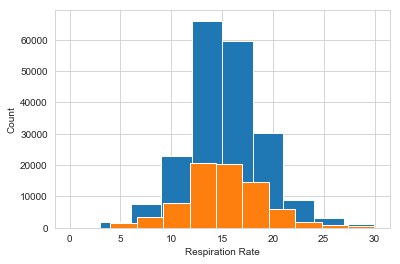

In [81]:
# Plotting to look at the difference in the data distribution between workdays and weekends
x_day_type = df_rr.loc[df_rr['day_type'] == 'work_day', 'rr']
y_day_type = df_rr.loc[df_rr['day_type'] == 'week_end', 'rr']
plt.hist(x_day_type)
plt.hist(y_day_type)
plt.xlabel('Respiration Rate')
plt.ylabel('Count')
plt.show()

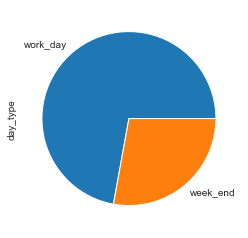

In [82]:
df_rr.day_type.value_counts(sort=False).plot.pie()
plt.show()

In [83]:
# Check the average respiration rates on work days and weekends
print(np.mean(x_day_type))
print(np.mean(y_day_type))

15.313828276952853
15.14214654555271


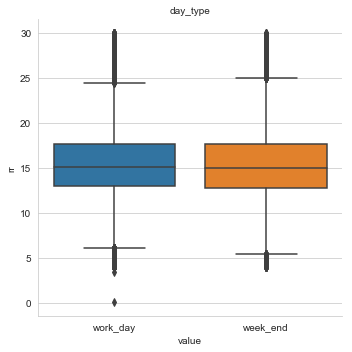

In [84]:
import seaborn as sns

df_melt = df_rr.melt(id_vars = 'rr',
                  value_vars = ['day_type'],
                  var_name = 'columns')

a = sns.catplot(data = df_melt,
                   y = 'rr',
                   x = 'value',
                   kind = 'box', # type of plot
                   col = 'columns',
                   col_order = ['day_type']).set_titles('{col_name}') 
#plt.ylim(10, 40)

In [33]:
df_rr.head()

In [95]:
#Splitting the time into "day" and "night"
import pandas as pd

def day_phase(c):
    
    if 0 <= c['time_hour'] <= 7:
        return 'night'
    else:
        return 'day'

df_rr['day_phase'] = df_rr.apply(day_phase, axis=1)

In [96]:
x_day_phase = df_rr.loc[df_rr['day_phase'] == 'day', 'rr']
y_day_phase = df_rr.loc[df_rr['day_phase'] == 'night', 'rr']

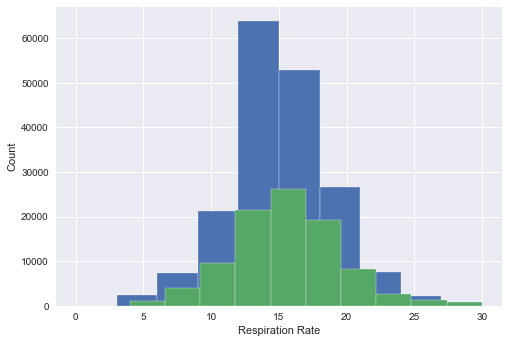

In [97]:
plt.hist(x_day_phase)
plt.hist(y_day_phase)
plt.xlabel('Respiration Rate')
plt.ylabel('Count')
plt.show()

In [98]:
print(np.mean(x_day_phase))
print(np.mean(y_day_phase))

15.099430557680371
15.592066766569035


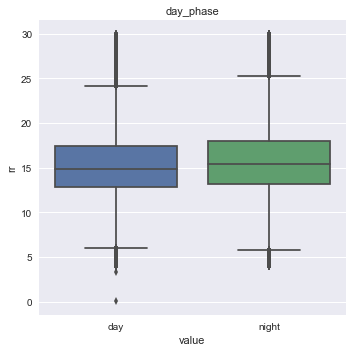

In [99]:
# Checking the difference in Respiration rates between day and night
df_melt = df_rr.melt(id_vars = 'rr',
                  value_vars = ['day_phase'],
                  var_name = 'columns')

a = sns.catplot(data = df_melt,
                   y = 'rr',
                   x = 'value',
                   kind = 'box', # type of plot
                   col = 'columns',
                   col_order = ['day_phase']).set_titles('{col_name}') 

In [284]:
import pandas as pd

def time_type(c):
    
    if 9 <= c['time_hour'] <= 17 and c['day_type'] =='work_day':
        return 'work'
    elif 17 < c['time_hour'] <= 24:
        return 'personal'

df_rr['time_type'] = df_rr.apply(time_type, axis = 1)

In [285]:
x_time_type = df_rr.loc[df_rr['time_type'] == 'work', 'rr']
y_time_type = df_rr.loc[df_rr['time_type'] == 'personal', 'rr']

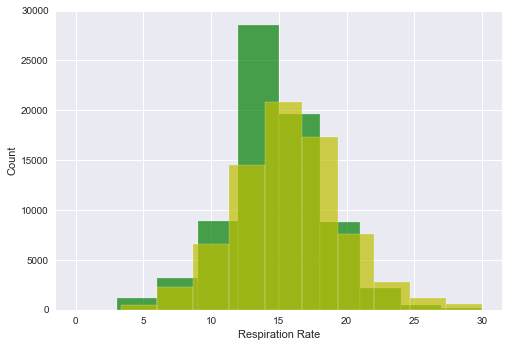

In [286]:
plt.hist(x_time_type, alpha = 0.7, color = 'g')
plt.hist(y_time_type, alpha = 0.7, color = 'y')
plt.xlabel('Respiration Rate')
plt.ylabel('Count')
plt.show()

In [282]:
print(np.mean(x_time_type))
print(np.mean(y_time_type))

14.627916430778303
15.784149933501526


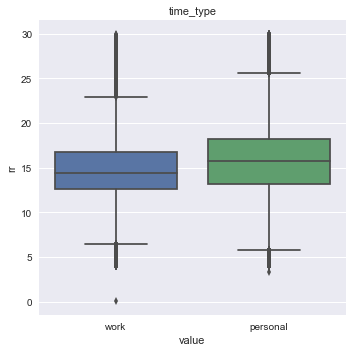

In [287]:
# Checking the difference in Respiration rates between day and night
df_melt = df_rr.melt(id_vars = 'rr',
                  value_vars = ['time_type'],
                  var_name = 'columns')

a = sns.catplot(data = df_melt,
                   y = 'rr',
                   x = 'value',
                   kind = 'box', # type of plot
                   col = 'columns',
                   col_order = ['time_type']).set_titles('{col_name}') 

In [159]:
import pandas as pd

def alert(c):
    if c['rr'] < 10.0:
        return 'Calm'
    elif 10 <= c['rr'] <= 20:
         return 'Normal'
    else:
        return 'Tense'

df_rr['mind_state'] = df_rr.apply(alert, axis=1)

In [160]:
x_mind_state = df_rr.loc[df_rr['mind_state'] == 'Calm', 'rr']
y_mind_state = df_rr.loc[df_rr['mind_state'] == 'Normal', 'rr']
z_mind_state = df_rr.loc[df_rr['mind_state'] == 'Tense', 'rr']

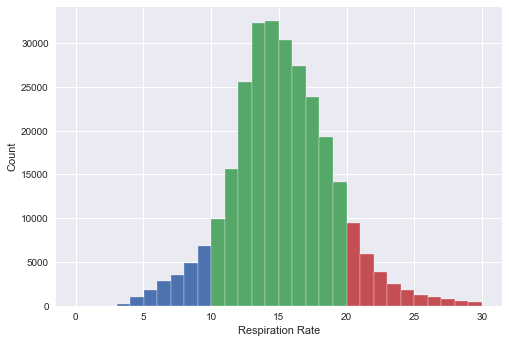

In [161]:
plt.hist(x_mind_state)
plt.hist(y_mind_state)
plt.hist(z_mind_state)
plt.xlabel('Respiration Rate')
plt.ylabel('Count')
plt.show()

In [163]:
print(np.mean(x_mind_state))
print(np.mean(y_mind_state))
print(np.mean(z_mind_state))

7.9401346245179765
15.081104075622747
22.43862350751603


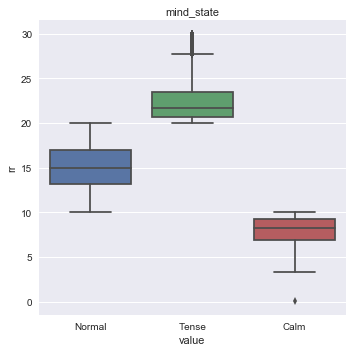

In [164]:
# Checking the difference in Respiration rates between day and night
df_melt = df_rr.melt(id_vars = 'rr',
                  value_vars = ['mind_state'],
                  var_name = 'columns')

a = sns.catplot(data = df_melt,
                   y = 'rr',
                   x = 'value',
                   kind = 'box', # type of plot
                   col = 'columns',
                   col_order = ['mind_state']).set_titles('{col_name}') 

In [165]:
def season(c):
    if 3 >= c['Month'] <= 5:
        return 'Spring'
    elif 6 >= c['Month'] <= 8:
         return 'Summer'
    elif 9 >= c['Month'] <= 11:
         return 'Fall'
    else:
        return 'Winter'

df_rr['Season'] = df_rr.apply(season, axis=1)

In [183]:
x_season = df_rr.loc[df_rr['Season'] == 'Spring', 'rr']
y_season = df_rr.loc[df_rr['Season'] == 'Summer', 'rr']
z_season = df_rr.loc[df_rr['Season'] == 'Fall', 'rr']
a_season = df_rr.loc[df_rr['Season'] == 'Winter', 'rr']

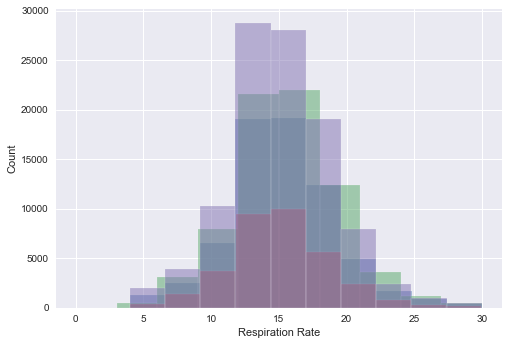

In [169]:
plt.hist(x_season, alpha = 0.5)
plt.hist(y_season, alpha = 0.5)
plt.hist(z_season, alpha = 0.5)
plt.hist(a_season, alpha = 0.5)
plt.xlabel('Respiration Rate')
plt.ylabel('Count')
plt.show()

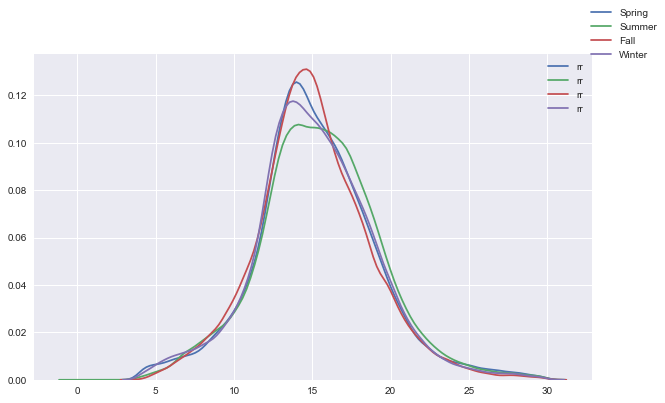

In [184]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x_season)
sns.kdeplot(y_season)
sns.kdeplot(z_season)
sns.kdeplot(a_season)
fig.legend(labels=['Spring','Summer','Fall', 'Winter'])
plt.show()

In [52]:
print(np.mean(x_season))
print(np.mean(y_season))
print(np.mean(z_season))
print(np.mean(a_season))

15.236691511142002
15.514847701496086
15.077492543626859
15.173029638103278


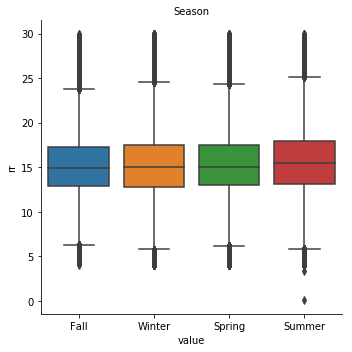

In [53]:
# Checking the difference in Respiration rates between day and night
df_melt = df_rr.melt(id_vars = 'rr',
                  value_vars = ['Season'],
                  var_name = 'columns')

a = sns.catplot(data = df_melt,
                   y = 'rr',
                   x = 'value',
                   kind = 'box', # type of plot
                   col = 'columns',
                   col_order = ['Season']).set_titles('{col_name}') 

In [200]:
import pandas as pd

def day_light(c):
    if c['Month'] == 3 & c['Year'] == 2018 & 10 < c['Day'] <= 13:
        return 'DST'
    elif c['Month'] == 3 & c['Year'] == 2019 & 10 < c['Day'] <= 13:
        return 'DST'
    elif c['Month'] == 3 & c['Year'] == 2017 & 11 < c['Day'] <= 14:
        return 'DST'
    elif c['Month'] == 11 & c['Year'] == 2017 & 4 < c['Day'] <= 7:
        return 'DST'
    elif c['Month'] == 11 & c['Year'] == 2018 & 3 < c['Day'] <= 6:
        return 'DST'
    else:
        return 'No DST'

df_rr['DST'] = df_rr.apply(day_light, axis=1)


In [201]:
x_day_light = df_rr.loc[df_rr['DST'] == 'DST', 'rr']
y_day_light = df_rr.loc[df_rr['DST'] == 'No DST', 'rr']

In [202]:
print(np.mean(x_day_light))
print(np.mean(y_day_light))

15.36057869296576
15.264565815647419


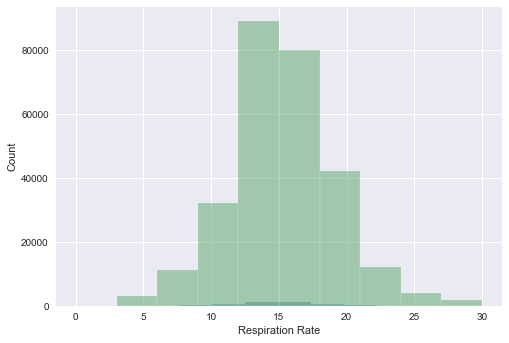

In [203]:
plt.hist(x_day_light, alpha = 0.5)
plt.hist(y_day_light, alpha = 0.5)
plt.xlabel('Respiration Rate')
plt.ylabel('Count')
plt.show()

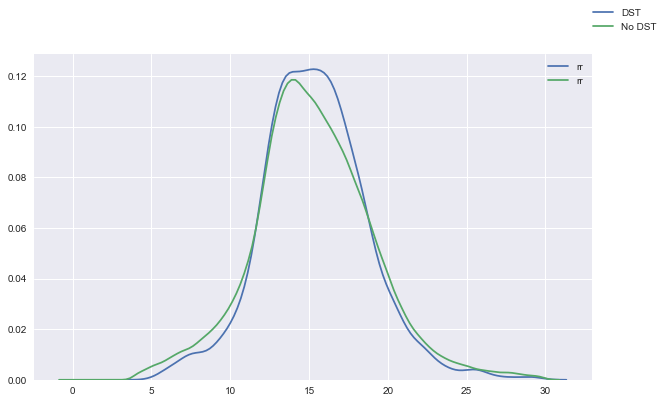

In [204]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x_day_light)
sns.kdeplot(y_day_light)
fig.legend(labels=['DST','No DST'])
plt.show()

In [58]:
print(np.mean(x_day_light))
print(np.mean(y_day_light))

15.481312049459074
15.262464204550438


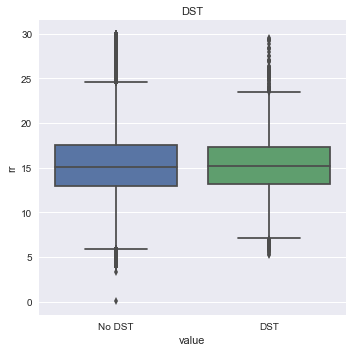

In [205]:
# Checking the difference in Respiration rates between day and night
df_melt = df_rr.melt(id_vars = 'rr',
                  value_vars = ['DST'],
                  var_name = 'columns')

a = sns.catplot(data = df_melt,
                   y = 'rr',
                   x = 'value',
                   kind = 'box', # type of plot
                   col = 'columns',
                   col_order = ['DST']).set_titles('{col_name}') 

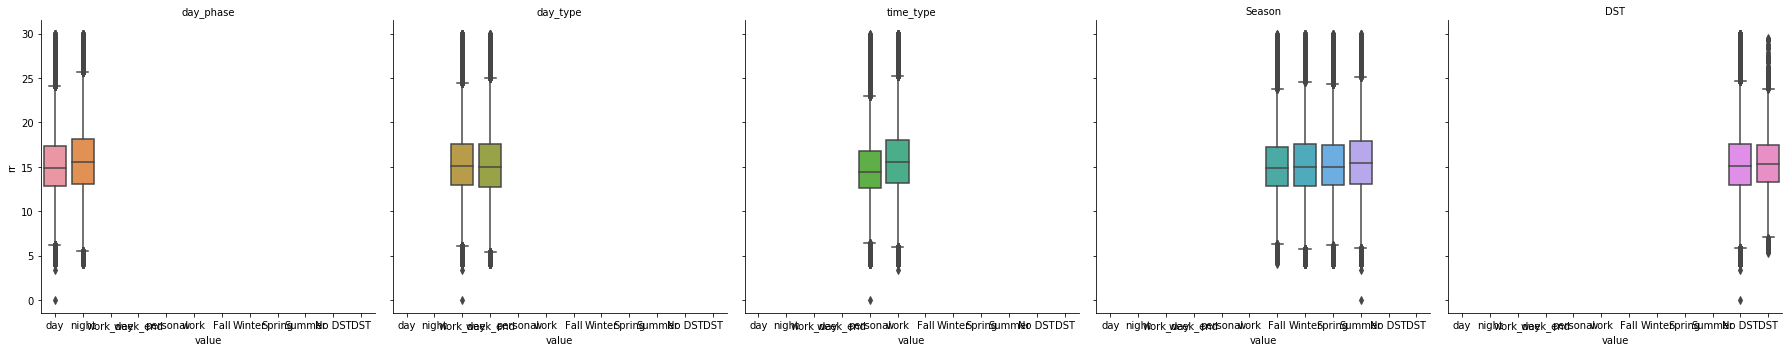

In [60]:

import seaborn as sns
df_melt = df_rr.melt(id_vars = 'rr',
                  value_vars = ['day_phase', 'day_type', 'time_type', 'Season', 'DST'],
                  var_name = 'columns')

a = sns.catplot(data = df_melt,
                   y = 'rr',
                   x = 'value',
                   kind = 'box', # type of plot
                   col = 'columns',
                   col_order = ['day_phase', 'day_type', 'time_type', 'Season', 'DST']).set_titles('{col_name}') 

In [55]:
df_rr.head(5)

,timestamp,rr,rr_std,date,time,day_of_week,Year,Month,Day,time_hour,day_type,day_phase,time_type,mind_state,Season,DST
0,9/11/2017 14:44,12.514043,26.100737,2017-09-11,1900-01-01 14:44:00,Monday,2017,9,11,14,work_day,day,personal,Normal,Fall,No DST
1,9/11/2017 14:45,14.149804,3.921936,2017-09-11,1900-01-01 14:45:00,Monday,2017,9,11,14,work_day,day,personal,Normal,Fall,No DST
2,9/11/2017 14:46,14.778218,1.097793,2017-09-11,1900-01-01 14:46:00,Monday,2017,9,11,14,work_day,day,personal,Normal,Fall,No DST
3,9/11/2017 14:47,12.203877,1.493707,2017-09-11,1900-01-01 14:47:00,Monday,2017,9,11,14,work_day,day,personal,Normal,Fall,No DST
4,9/11/2017 14:48,10.389535,1.005532,2017-09-11,1900-01-01 14:48:00,Monday,2017,9,11,14,work_day,day,personal,Normal,Fall,No DST


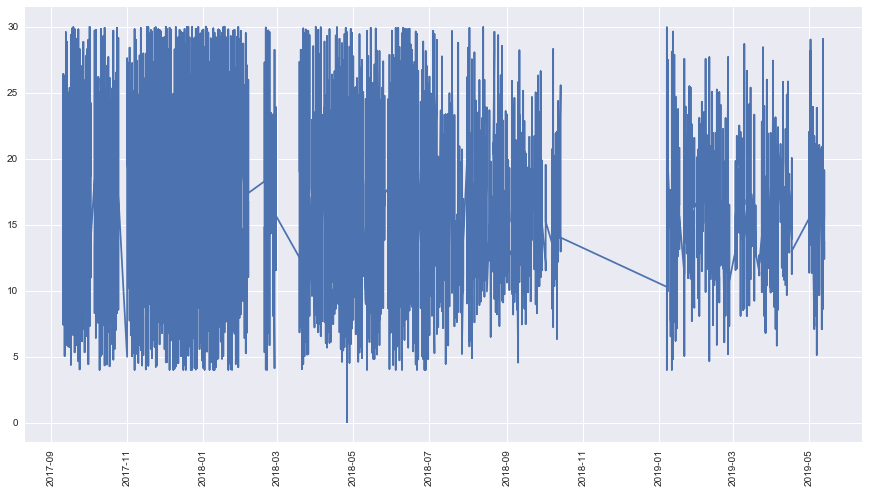

In [211]:
plt.figure(figsize=(15,8))
x = df_rr['date']
y = df_rr['rr']
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show()

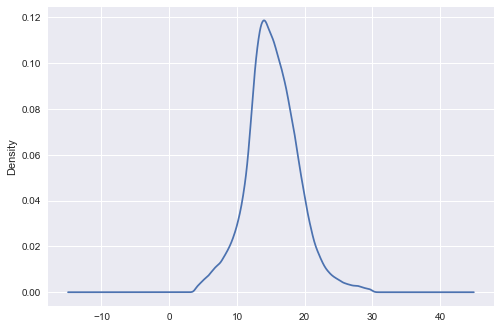

In [238]:
from pandas import Series
series = pd.Series(df_rr['rr'].values, index=df_rr['date'])
#series.plot(style='k.')
series.plot(kind='kde')
plt.show()

C:\Users\sures\New_folder\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  import sys


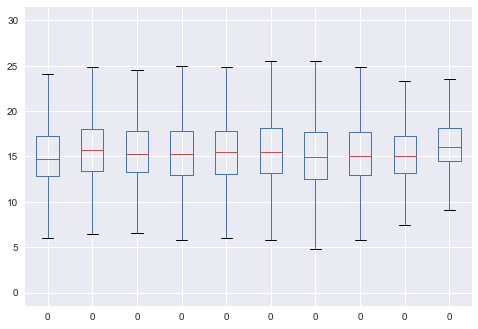

In [249]:
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
from pandas import concat
series = pd.Series(df_rr['rr'].values, index=df_rr['date'])
one_year = series['2018']
groups = one_year.groupby(TimeGrouper('M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
#months.columns = range(1,13)
#plt.xlim(1,12)
months.boxplot()
plt.show()

C:\Users\sures\New_folder\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  import sys


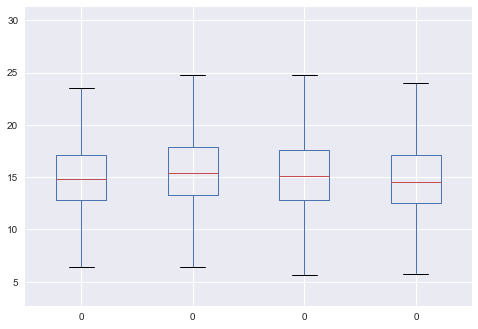

In [263]:
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
from pandas import concat
series = pd.Series(df_rr['rr'].values, index=df_rr['date'])
one_year = series['2017']
groups = one_year.groupby(TimeGrouper('M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
#months.columns = range(1,13)
#plt.xlim(1,12)
months.boxplot()
plt.show()

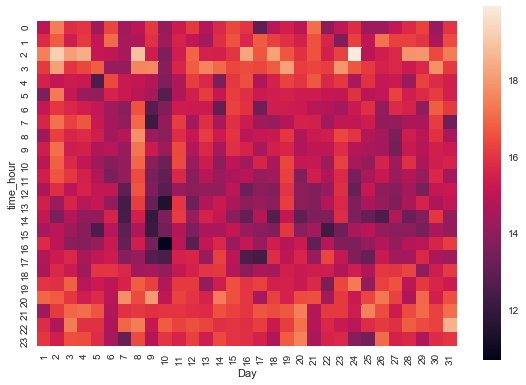

In [289]:
piv = pd.pivot_table(df_rr, values="rr",index=["time_hour"], columns=["Day"], fill_value=0)
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(piv, square=True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()

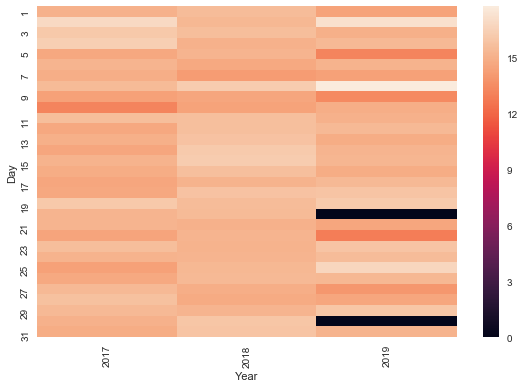

In [295]:
piv = pd.pivot_table(df_rr, values="rr",index=["Day"], columns=["Year"], fill_value=0)
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(piv)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()

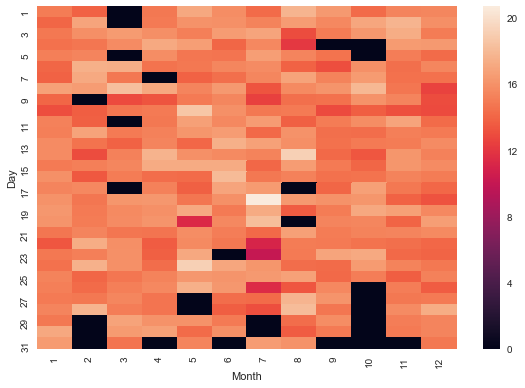

In [293]:
piv = pd.pivot_table(df_rr, values="rr",index=["Day"], columns=["Month"], fill_value=0)
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(piv)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()

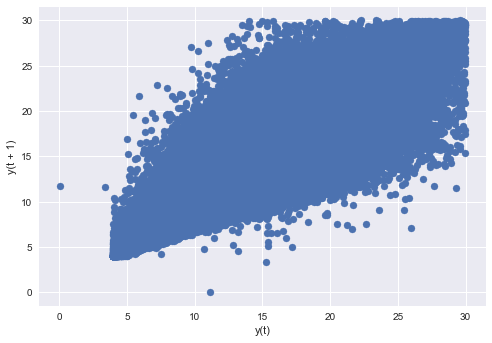

In [296]:
#from pandas.tools.plotting import lag_plot
from pandas.plotting import lag_plot
series = pd.Series(df_rr['rr'].values, index=df_rr['date'])
lag_plot(series)
plt.show()

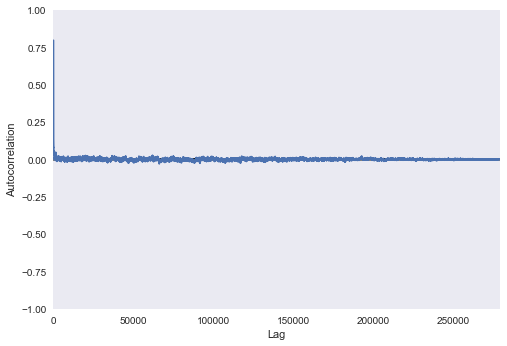

In [261]:
#from pandas.tools.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot
series = pd.Series(df_rr['rr'].values, index=df_rr['date'])
autocorrelation_plot(series)
plt.show()

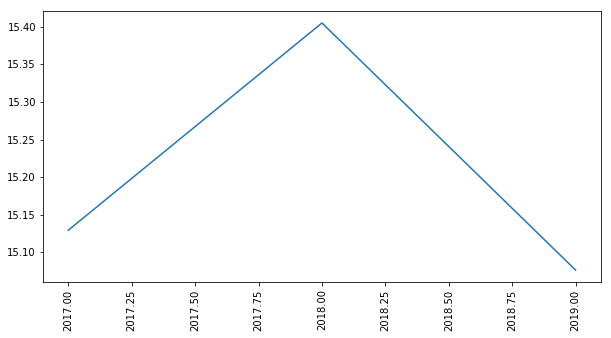

In [62]:
df_years = df_rr.groupby('Year', as_index=False)['rr'].mean()
plt.figure(figsize=(10,5))
x = df_years['Year']
y = df_years['rr']
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show()

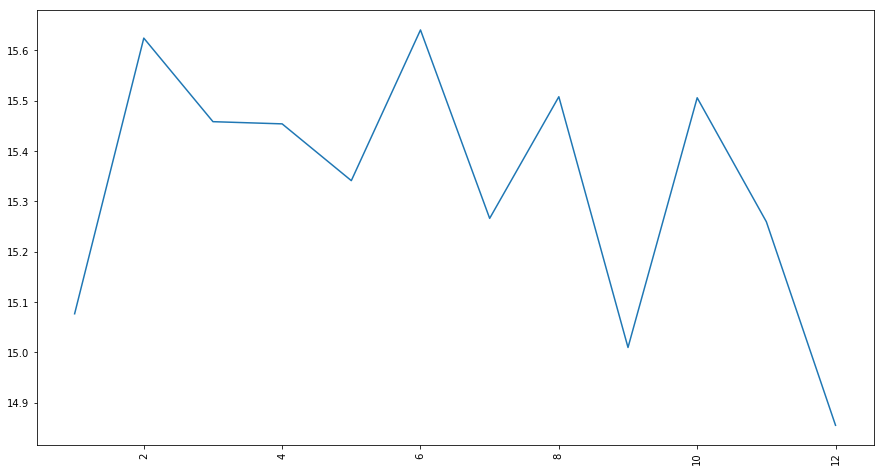

In [63]:
df_months = df_rr.groupby('Month', as_index=False)['rr'].mean()
plt.figure(figsize=(15,8))
x = df_months['Month']
y = df_months['rr']
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show()

<Figure size 1440x576 with 0 Axes>

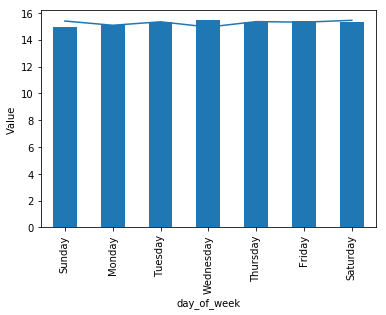

In [64]:
df_days = df_rr.groupby('day_of_week', as_index=False)['rr'].mean()
plt.figure(figsize=(20,8))
x = df_days['day_of_week']
y = df_days['rr']
field = "day_of_week"
day_order = ["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
ax = df_days.set_index("day_of_week").loc[day_order].plot(kind="bar", legend=False)
ax.set_ylabel("Value")
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show()

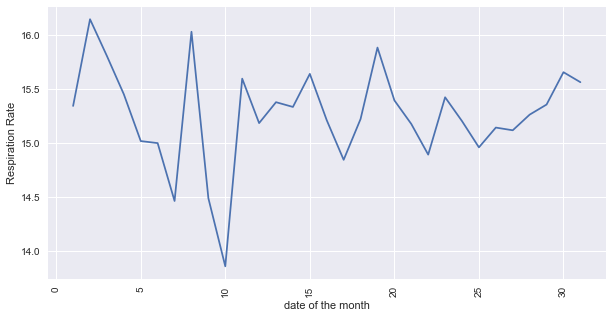

In [264]:
df_day = df_rr.groupby('Day', as_index=False)['rr'].mean()
plt.figure(figsize=(10,5))
x = df_day['Day']
y = df_day['rr']
plt.xticks(rotation=90)
plt.plot(x,y)
plt.xlabel('date of the month')
plt.ylabel('Respiration Rate')
plt.show()

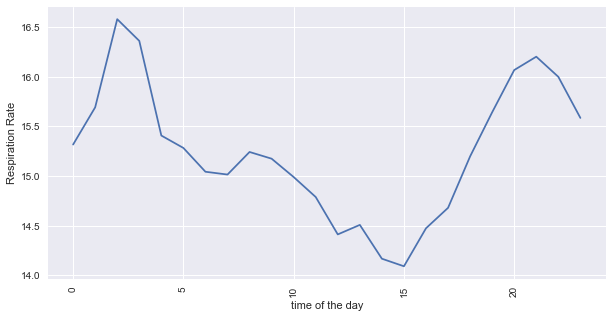

In [288]:
df_time = df_rr.groupby('time_hour', as_index=False)['rr'].mean()
plt.figure(figsize=(10,5))
x = df_time['time_hour']
y = df_time['rr']
plt.xticks(rotation=90)
plt.plot(x,y)
plt.xlabel('time of the day')
plt.ylabel('Respiration Rate')
plt.show()

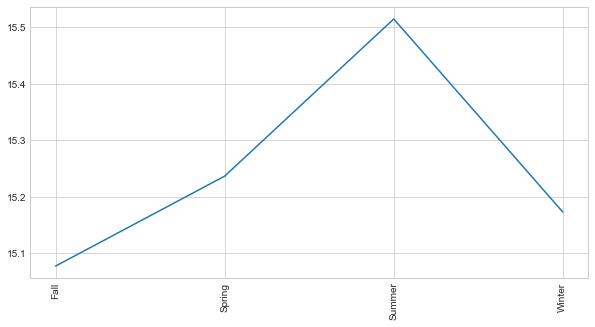

In [67]:
df_season = df_rr.groupby('Season', as_index=False)['rr'].mean()
plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')
x = df_season['Season']
y = df_season['rr']
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show()

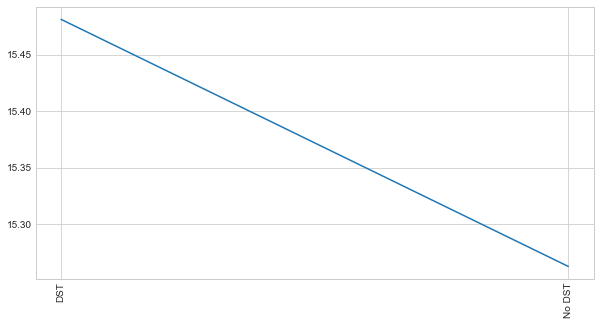

In [68]:
df_dst = df_rr.groupby('DST', as_index=False)['rr'].mean()
plt.figure(figsize=(10,5))
x = df_dst['DST']
y = df_dst['rr']
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show()

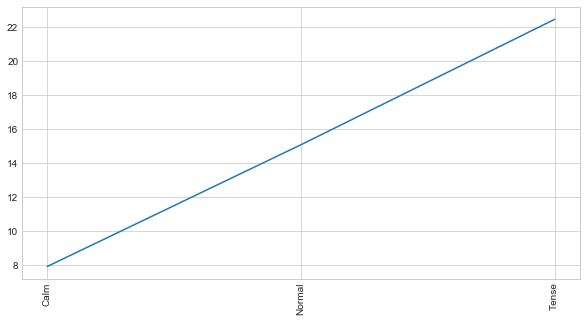

In [69]:
df_mind = df_rr.groupby('mind_state', as_index=False)['rr'].mean()
plt.figure(figsize=(10,5))
x = df_mind['mind_state']
y = df_mind['rr']
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show()

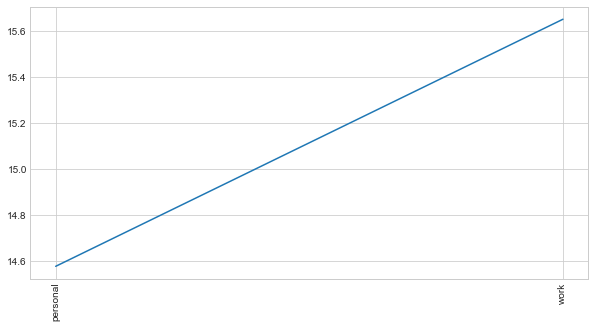

In [70]:
df_time_type = df_rr.groupby('time_type', as_index=False)['rr'].mean()
plt.figure(figsize=(10,5))
x = df_time_type['time_type']
y = df_time_type['rr']
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show()

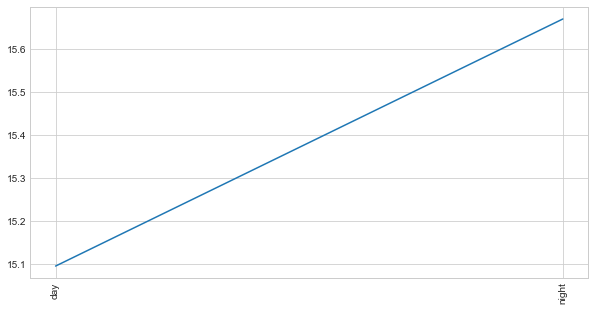

In [71]:
df_day_phase = df_rr.groupby('day_phase', as_index=False)['rr'].mean()
plt.figure(figsize=(10,5))
x = df_day_phase['day_phase']
y = df_day_phase['rr']
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show()

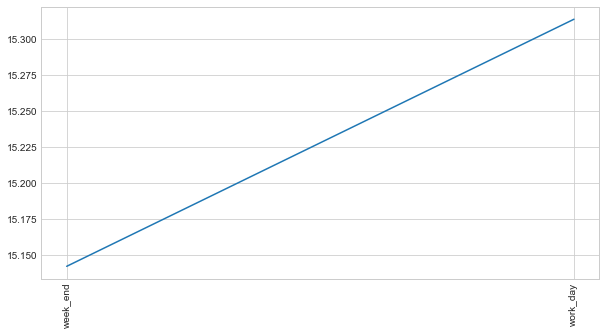

In [72]:
df_day_type = df_rr.groupby('day_type', as_index=False)['rr'].mean()
plt.figure(figsize=(10,5))
x = df_day_type['day_type']
y = df_day_type['rr']
plt.xticks(rotation=90)
plt.plot(x,y)
plt.show()

In [97]:
alt.renderers.enable('notebook')
import altair as alt
{
  "description": "A scatterplot showing respiration rates and mental states.",
  "data": {"url": "df_rr"},
  "mark": "point",
  "encoding": {
    "x": {"field": "Month", "type": "quantitative"},
    "y": {"field": "rr", "type": "quantitative"},
    "color": {"field": "alert", "type": "nominal"},
  }
}

{'description': 'A scatterplot showing respiration rates and mental states.',
 'data': {'url': 'df_rr'},
 'mark': 'point',
 'encoding': {'x': {'field': 'Month', 'type': 'quantitative'},
  'y': {'field': 'rr', 'type': 'quantitative'},
  'color': {'field': 'alert', 'type': 'nominal'}}}

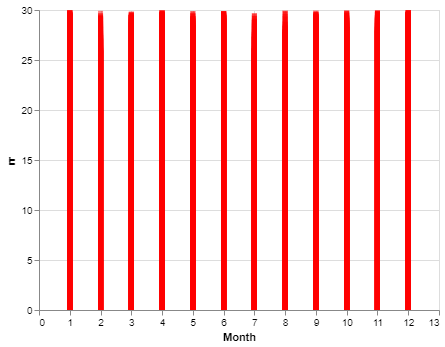

In [299]:
import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.enable('csv')

alt.Chart(df_rr).mark_bar().encode(
    x='Month',
    y='rr',
    opacity=alt.value(0.5),
    color=alt.value('red')
)

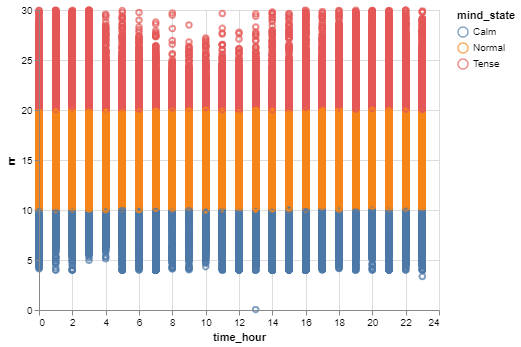

In [300]:
alt.Chart(df_rr).mark_point().encode(
    alt.X('time_hour:Q'),
    alt.Y('rr:Q'),
     color='mind_state:N'
)

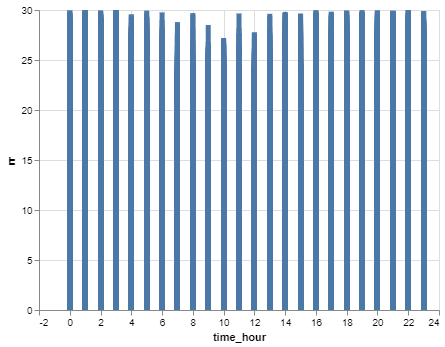

In [301]:
alt.Chart(df_rr).mark_bar().encode(
    alt.X('time_hour:Q'),
    alt.Y('rr:Q'),
     )

In [101]:
df_rr.head()

,timestamp,rr,rr_std,date,time,day_of_week,Year,Month,Day,time_hour,day_type,day_phase,time_type,mind_state,Season,DST
0,9/11/2017 14:44,12.514043,26.100737,2017-09-11,1900-01-01 14:44:00,Monday,2017,9,11,14,work_day,day,personal,Normal,Fall,No DST
1,9/11/2017 14:45,14.149804,3.921936,2017-09-11,1900-01-01 14:45:00,Monday,2017,9,11,14,work_day,day,personal,Normal,Fall,No DST
2,9/11/2017 14:46,14.778218,1.097793,2017-09-11,1900-01-01 14:46:00,Monday,2017,9,11,14,work_day,day,personal,Normal,Fall,No DST
3,9/11/2017 14:47,12.203877,1.493707,2017-09-11,1900-01-01 14:47:00,Monday,2017,9,11,14,work_day,day,personal,Normal,Fall,No DST
4,9/11/2017 14:48,10.389535,1.005532,2017-09-11,1900-01-01 14:48:00,Monday,2017,9,11,14,work_day,day,personal,Normal,Fall,No DST
